15.077/IDS.147 Problem Set 6 <br>
**Name:** Chun-Hei Lam. **ID:** 928931321 <br>
**Declaration:** I pledge that the work submitted for this coursework is my own unassisted work unless stated otherwise. <br>
**Acknowledgement to:** Harry Yu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
import sklearn.linear_model
import sklearn.model_selection
import sklearn.tree
import graphviz

# Financial Condition of Banks

The file `Banks.xls` includes data on a sample of 20 banks. The Financial Condition column records the judgment of an expert on the financial condition of each bank. This response variable takes one of two possible values, `weak`  or `strong`, according to the financial condition of the bank. The predictors are two ratios used in the financial analysis of banks: $x_1=$ `TotLns&Lses/Assets` is the ratio of total loans andleases to total assets and $x_2=$ `TotExp/Assets` is the ratio of total expenses to total assets. The target is to use the two ratios for classifying the financial condition of a new bank. 

In [6]:
financial = pd.read_csv("./Banks.csv")
financial

,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,8.1,0.13,0.64
1,2,1,6.6,0.10,1.04
2,3,1,5.8,0.11,0.66
3,4,1,12.3,0.09,0.80
4,5,1,4.5,0.11,0.69
5,6,1,9.1,0.14,0.74
6,7,1,1.1,0.12,0.63
7,8,1,8.9,0.12,0.75
8,9,1,0.7,0.16,0.56
9,10,1,9.8,0.12,0.65


Run a logistic regression model (on the entire dataset) that models the status of a bank as a function of the two financial measures provided. Specify the success class as weak (this is similar to creating a dummy that is `1` for financially weak banks and `0` otherwise), and use the default cutoff value of 0.5.

In [15]:
skmodel = sklearn.linear_model.LogisticRegression().fit(financial[["TotLns&Lses/Assets", "TotExp/Assets"]], financial["Financial Condition"])
skmodel.coef_

array([[0.74391107, 0.16053299]])

Denote the intercept term $\beta_0$. For the following part I write the estimator of $\beta_i$'s be $\hat{\beta}_i$'s for $i=0,1,2$. Also write probability of being classified as $1$ as $p$, so that the probability of being classified as $0$ is $1-p$. <br>

**Part (a):** Write the estimated equation that associates the financial condition of a bank with its two predictors in three formats: <br>
i. The logit as a function of the predictors
\begin{equation}
\ln \left(\frac{p}{1-p}\right) = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_1 x_2
\end{equation}
ii. The odds as a function of the predictors <br>
\begin{equation}
\frac{p}{1-p} = \exp \left( \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_1 x_2 \right)
\end{equation}
iii. The probability as a function of the predictors <br>
\begin{equation}
p = \frac{1}{1+\exp\left( - \left( \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_1 x_2 \right) \right)}
\end{equation}

**Part (b):** Consider a new bank whose totalloans and leases/assets ratio `TotLns&Lses/Assets` = 0.6 and total expenses/assets ratio `TotExp/Assets` = 0.11. From your logistic regression model, estimate the following four quantities for this bank: the logit, the odds, the probability of being financially weak, and the classification of the bank.

In [25]:
X = [[0.6, 0.11]]
print(f"logit = {skmodel.predict_log_proba(X)[0][1] - skmodel.predict_log_proba(X)[0][0]}")
print(f"odd = {skmodel.predict_proba(X)[0][1] / skmodel.predict_proba(X)[0][0]}")
print(f"probability = {skmodel.predict_proba(X)[0][1]}")
print(f"classification = {skmodel.predict(X)[0]}")

logit = -0.023096114955381997
odd = 0.9771685587471249
probability = 0.4942262279177293
classification = 0


**Part (c):** The cutoff value of 0.5 is used in conjunction with the probability of being financially weak. Compute the threshold that should be used if we want to make a classification based on the odds of being financially weak, and the threshold for the corresponding logit. 

|Class|Probability|Odds|Logit|
|-- |-- |-- |--|
|Weak | `1`| `>0.5` | `>1` | `>0` |
|Strong | `0`| `<0.5` | `<1` | `<0` |

**Part (d):** Interpret the estimated coefficient for the total loans and leases to total assets ratio (`TotLns&Lses`/`Assets`) in terms of the odds of being financially weak. <br>
*Interpretation: When the `TotLns&Lses/Assets` is increased by one unit, the odd increases by a factor of $\exp(\hat{\beta_1})$.*

**Part (e):** When a bank that is in poor financial condition is misclassified as financially strong, the misclassification cost is much higher than when a financially strong bank is misclassified as weak. To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased? <br>

*Solution: The cutoff should be decreased.*

**Part (f):** If the software you are using makes it fairly easy to do, try five-fold cross validation to choose the optimal cutoff value.

# Competitive Auctions in eBay.com

The file `eBayAuctions.xls` contains information on 1972 auctions transacted on eBay.com. The goal is to use these data to build a model that will classify competitive auctions from noncompetitive ones. A competitive auction is defined as an auction with at least two bids placed on the item auctioned. The data include variables that 
- describe the item (auction category), 
- the seller (his/her eBay rating), and 
- the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). 
In addition, we have the price at which the auction closed. The goal is to predict whether or not the auction will be competitive.

In [10]:
auction = pd.read_csv("eBayAuctions.csv")
auction

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


**Data Preprocessing**. (1) Create dummy variables for the categorical predictors. These include `Category` (18 categories), `Currency` (USD, GBP, Euro), `EndDay` (Monday-Sunday), and `Duration` (1, 3, 5, 7, or 10 days). 

In [18]:
dummy_auction = pd.get_dummies(auction, columns=["Category", "currency", "Duration", "endDay"])
dummy_auction.columns

Index(['sellerRating', 'ClosePrice', 'OpenPrice', 'Competitive?',
       'Category_Antique/Art/Craft', 'Category_Automotive', 'Category_Books',
       'Category_Business/Industrial', 'Category_Clothing/Accessories',
       'Category_Coins/Stamps', 'Category_Collectibles', 'Category_Computer',
       'Category_Electronics', 'Category_EverythingElse',
       'Category_Health/Beauty', 'Category_Home/Garden', 'Category_Jewelry',
       'Category_Music/Movie/Game', 'Category_Photography',
       'Category_Pottery/Glass', 'Category_SportingGoods',
       'Category_Toys/Hobbies', 'currency_EUR', 'currency_GBP', 'currency_US',
       'Duration_1', 'Duration_3', 'Duration_5', 'Duration_7', 'Duration_10',
       'endDay_Fri', 'endDay_Mon', 'endDay_Sat', 'endDay_Sun', 'endDay_Thu',
       'endDay_Tue', 'endDay_Wed'],
      dtype='object')

(2) Split the data into training and validation datasets using a 60% : 40% ratio.

In [47]:
X = dummy_auction.drop(columns = ["Competitive?"])
y = dummy_auction["Competitive?"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.4, random_state = 1234)

**Part (a):** Fit a classification tree using all predictors, using the best pruned tree. To avoid overfitting, set the minimum number of observations in a leaf node to 50. Also, set the maximum number of levels to be displayed at seven.  To remain within the limitation of your software, combine some of the categories of categorical predictors.  Write down the results in terms of rules.

In [55]:
clf1 = sklearn.tree.DecisionTreeClassifier(min_samples_leaf = 50).fit(X_train, y_train)

1


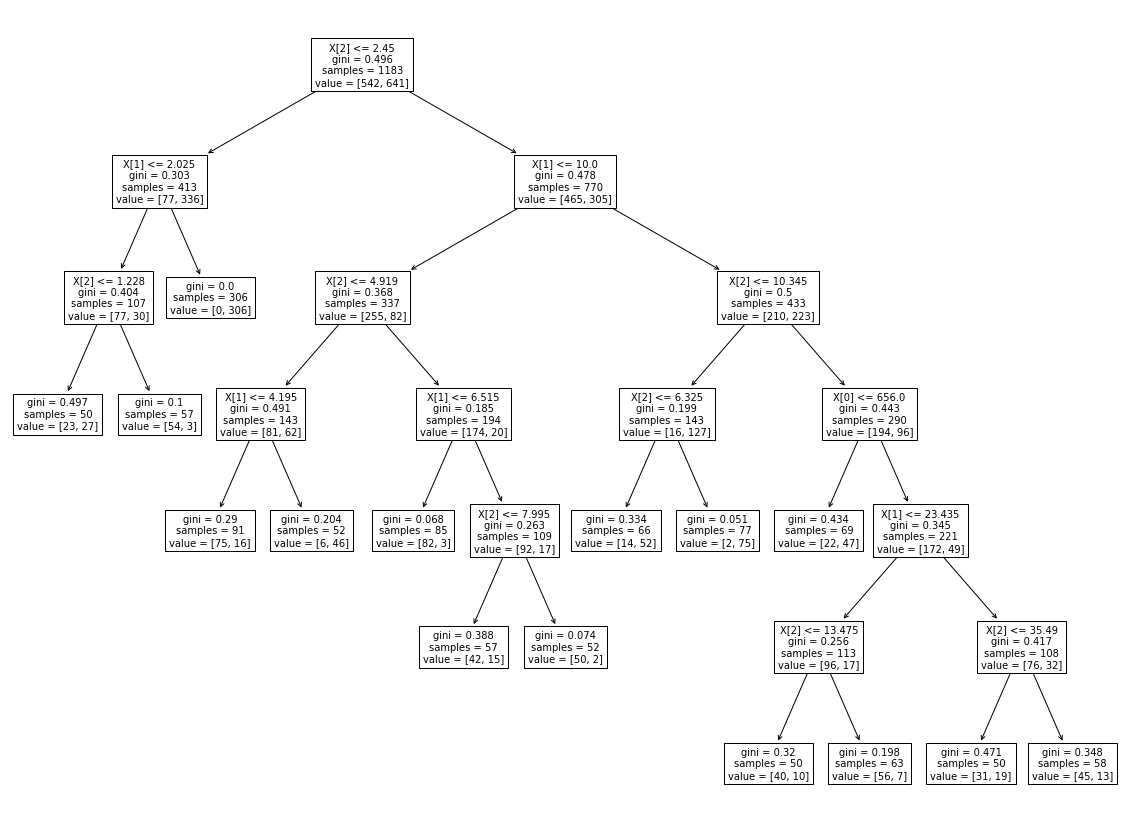

In [65]:
fig, ax = plt.subplots(figsize = (20,15))
sklearn.tree.plot_tree(clf1, ax=ax)
print(1)

**Part (b):** Is this model practical for predicting the outcome of a new auction? 

**Part (c):** Describe the interesting and uninteresting information that these rules provide.

**Part (d):** Fit another classification tree (using the best-pruned tree, with a minimum number of observations per leaf node = 50 and maximum allowed number of displayed levels), this time only with predictors that can be used for predicting the outcome of a new auction. Describe the resulting tree in terms of rules. Make sure to report the smallest set of rules required for classification.

**Part (e):** Plot the resulting tree on a scatterplot: Use the two axes for the two best (quantitative) predictors. Each auction will appear as a point, with coordinates corresponding to its values on those two predictors. Use different colors or symbols to separate competitive and noncompetitive auctions. Draw lines (you can sketch these by hand or use software) at the values that create splits. Does this splitting seem reasonable with respect tothe meaning of the two predictors?  Does it seem to do a good job of separating the two classes?

**Part (f):** Examine the classification table for the tree. What can you say about the predictive performance of this model?

**Part (g):** Based on this last tree, what can you conclude from these data about the chances of an auction obtaining at least two bids and its relationship to the auction settings set by the seller (duration, opening price, ending day, currency)?  What would you recommend for a seller as the strategy that will most likely lead to a competitive auction?

# Spam Data
Fit a SVM model to the spamdata and compare the classification results to the tree model given in Section 9.2.5 for the spam data. For example, you might look at measures like sensitivity and specificity. You might also compare the interpretability of the two models.